## Outline of tasks for GeoPandas-intro episode
11/7/2016

**FIRST, create the environment I'll use!**

- What is GeoPandas, and why use it
    - adds geometry/geospatial data type, capabilities, to Pandas. Attributes + geometry
    - makes geospatial operations and handling simpler, compared to its underlying libraries. No need to iterate over each geometry (or feature)!
    - adds very convenient plotting
- concepts: geoseries, geodataframe, geometry column (based on shapely geometry objects, methods on geometry column. BUT don't overdo the "text" intro; introduce most of the concepts via code
    - a gdf row is effectively a "feature" (properties + geometry)
    - a gdf is analogous to a spatially enabled table in Postgresql/PostGIS (and other RDBMS), which include a geometry column
- create trivially simple geodataframe from scratch: two records, each with one point (from WKT?), 1-2 attributes. *Use these to illustrate the geoseries and geodataframe concepts! Build them incrementally.*
- read shape files into geodataframe; try point and polygon shape files
    - use our GOA-ON, modified world seas shape file (ie, assigned attribute of ocean)
    - use LME's, too
    - for analysis and area calculations, consider using WRIAs in state plane
    - Or instead, for hierarchical watersheds, use HydroBASINS, in Washington (or San Juan / CR?). Work with its Pfastetter codes?!
- (later, or right here: briefly show reading from GeoJSON -- try from github repo! -- and cloud/PostGIS)
- read/print (or assign?) crs
- list gdf (eg, head, on notebook)
- simple geometry queries: if polygon, get area; get bounding box (look up such methods in the geopandas docs)
- **crs transform using to_crs (and auxiliary packages like pyepsg?)**
- plotting
    - plot() method (inline)
    - various nifty plot() examples, including more than one "layer"
    - **folium mapping (see Filipe's notebooks)**. Also mplleaflet?
- create new gdf from bounding box geometry method?
- pandas filtering based on attribute and geometry method criteria; on the latter, can use polygon area, "x" (longitude) values, etc
- **write out to file; show 2 formats (shape file, GeoPackage, GeoJSON?)**
- `__geo_interface__` (see Matt Perry's recent post)

### Additional, useful text

#### From geopandas doc
A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation .... geopandas has three basic classes of geometric objects (which are actually shapely objects):
- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

Note that all entries in a GeoSeries need not be of the same geometric type, although certain export operations will fail if this is not the case.

## Set up -- packages and file paths

In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
# Test results both with and without setting seaborn
import seaborn as sns
# Lookup the specs for 'bmh'
plt.style.use('bmh')

import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

/home/mayorga/miniconda/envs/uwgeohack_vector1/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_pth = "../data"

## 1. GeoSeries, construction of simplest cases

In [3]:
from shapely.geometry import Point
from shapely.wkt import loads

In [4]:
GeoSeries([loads('POINT(1 2)'), loads('POINT(1.5 2.5)'), loads('POINT(2 3)')])

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

In [5]:
gs = GeoSeries([Point(1,2), Point(1.5, 2.5), Point(2,3)])
gs

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

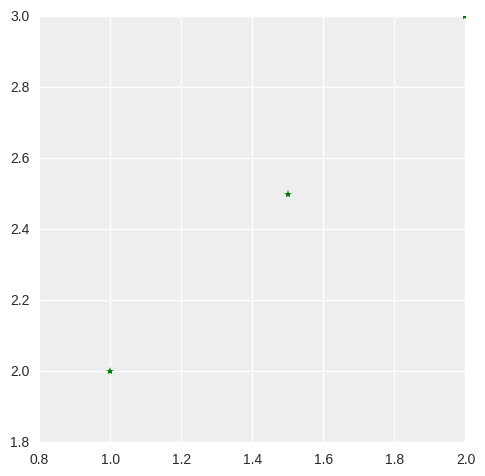

In [6]:
# Note use of standard `pyplot` line style options
gs.plot(marker='*', color='green', markersize=6);

## GeoDataFrames

### Load and examine "oceans" shape file

In [7]:
oceans = gpd.read_file(os.path.join(data_pth, "oceans.shp"))

In [8]:
oceans.head()

,ID,Oceans,geometry,my_polygon
0,1,South Atlantic Ocean,POLYGON ((-67.26025728926088 -59.9309210526315...,S.Atlantic
1,0,North Pacific Ocean,"(POLYGON ((180 66.27034771241199, 180 0, 101.1...",N.Pacific
2,3,Southern Ocean,"POLYGON ((180 -60, 180 -90, -180 -90, -180 -60...",Southern
3,2,Arctic Ocean,POLYGON ((-100.1196521436255 52.89103112710165...,Arctic
4,5,Indian Ocean,POLYGON ((19.69705552221351 -59.94160091330382...,Indian


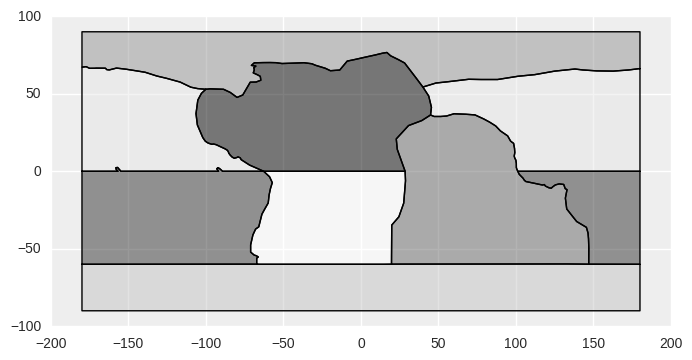

In [9]:
oceans.plot();

In [10]:
oceans.geom_type

0         Polygon
1    MultiPolygon
2         Polygon
3         Polygon
4         Polygon
5    MultiPolygon
6         Polygon
dtype: object

In [11]:
oceans.geometry.area

0     5287.751094
1    11805.894558
2    10822.509589
3     9578.786157
4     9047.879388
5     9640.457926
6     8616.721287
dtype: float64

In [12]:
oceans.geometry.bounds

,minx,miny,maxx,maxy
0,-71.183612,-60.000000,28.736134,0.000000
1,-180.000000,0.000000,180.000000,67.479386
2,-180.000000,-90.000000,180.000000,-59.806846
3,-180.000000,47.660532,180.000000,90.000000
4,19.697056,-59.945004,146.991853,37.102940
5,-180.000000,-60.000000,180.000000,2.473291
6,-106.430148,0.000000,45.468236,76.644442


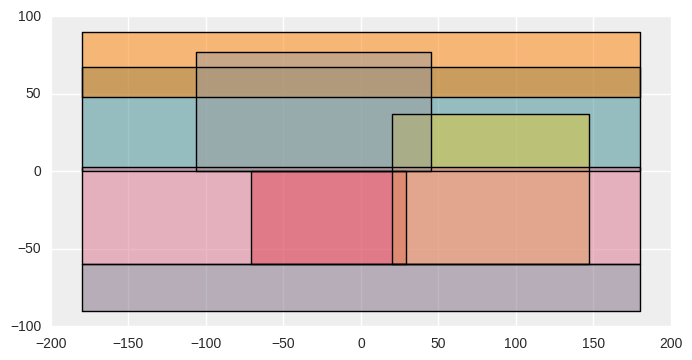

In [13]:
oceans.envelope.plot();

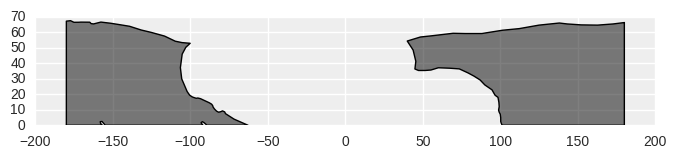

In [14]:
# It's a multipolygon, that's why we see those envelope boxes spanning all longitudes
oceans[oceans['Oceans'] == 'North Pacific Ocean'].plot();

In [15]:
# the crs can be set manually if not already assigned or read
# here's one way, with fiona

# from fiona.crs import from_epsg
# oceans.crs = from_epsg(4326)

In [16]:
oceans.crs

{'init': u'epsg:4326'}

In [17]:
# Removing for now, to avoid having that goaoninv file directly in the geohack repo

#goaonpts_gpkg = gpd.read_file(os.path.join(data_pth, "goaoninv.gpkg"))
#goaonpts_gpkg.head(3)
#goaonpts_gpkg.plot();

### Load "Natural Earth" countries, a dataset that comes with GeoPandas as a useful sample

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(3)

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0


In [19]:
world.crs

{'init': u'epsg:4326'}

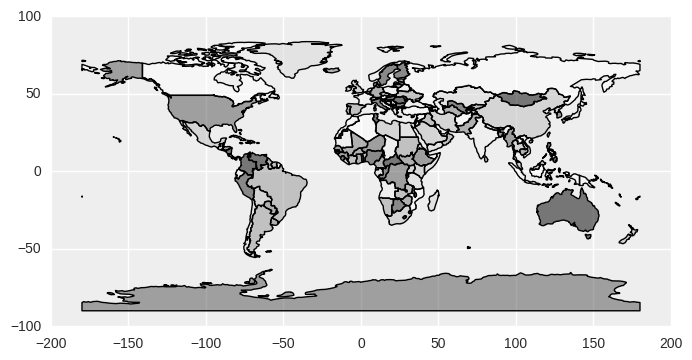

In [20]:
world.plot();

**Other useful plotting commands and options:**
```python
f, ax = plt.subplots(1, figsize=(9, 9))
both.plot(column='Status_Majority', categorical=True, legend=True, axes=ax, 
          linewidth=0.1, colormap='Set3')
ax.set_title('Status Majority')
plt.axis('equal')
```

### Map plot overlays

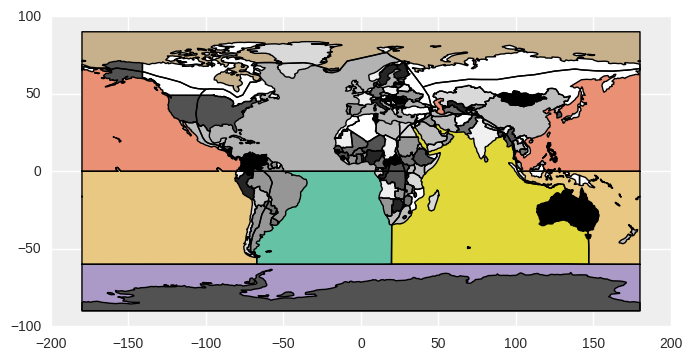

In [21]:
# colormap=plt.cm.Blues_r)
# I need to look into how to get alpha's to work as a true overlay (full covering)
# The polygon boundaries are coming through
world.plot(ax=oceans.plot(cmap='Set2', alpha=1), alpha=1);

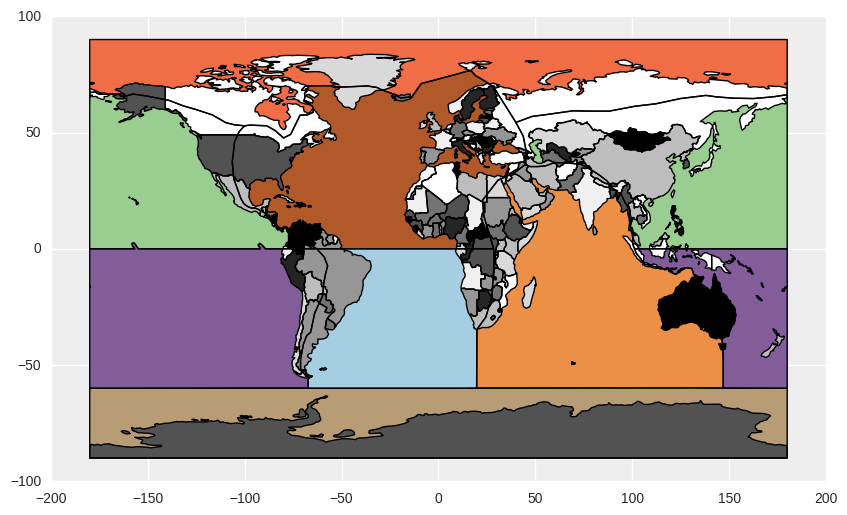

In [22]:
f, ax = plt.subplots(1, figsize=(10, 6))
oceans.plot(cmap='Paired', alpha=1, ax=ax)  # or Set2, Set3
world.plot(alpha=1, ax=ax);
# adding zorder made no difference

## Reading from PostGIS into GeoDataFrame
From AWS PostgreSQL/PostGIS database.
Change the notebook to read World_Seas.shp only once, only from PostGIS (ie, remove the statements above that read from shape file)

In [23]:
import json
import psycopg2

In [24]:
with open(os.path.join(data_pth, ".db.json")) as f:
    db_conn_dict = json.load(f)

In [25]:
print(" host: %(host)s\n port: %(port)d\n database: %(database)s" % db_conn_dict)

 host: geohackweek2016.czoeuvaufkjq.us-west-2.rds.amazonaws.com
 port: 5432
 database: geohackweek2016


In [26]:
conn = psycopg2.connect(**db_conn_dict)

In [27]:
seas = GeoDataFrame.from_postgis("select * from world_seas", conn, 
                                 geom_col='geometry', crs={'init': u'epsg:4326'}, 
                                 coerce_float=False)
# geom_col and crs apparently can not be inferred/read if not specified explicitly.
# Hmm, look into it.

In [28]:
conn.close()

In [29]:
seas.head()

,gid,name,id,gazetteer,is_generic,oceans,geometry
0,1,Inner Seas off the West Coast of Scotland,18,4283,False,North Atlantic Ocean,(POLYGON ((-6.496945454545455 58.0874909090909...
1,2,Mediterranean Sea - Western Basin,28A,4279,False,North Atlantic Ocean,"(POLYGON ((12.4308 37.80325454545454, 12.41498..."
2,3,Mediterranean Sea - Eastern Basin,28B,4280,False,North Atlantic Ocean,(POLYGON ((23.60853636363636 35.60874545454546...
3,4,Sea of Marmara,29,3369,False,North Atlantic Ocean,(POLYGON ((26.21790909090909 40.05290909090909...
4,5,Black Sea,30,3319,False,North Atlantic Ocean,(POLYGON ((29.04846363636364 41.25555454545454...


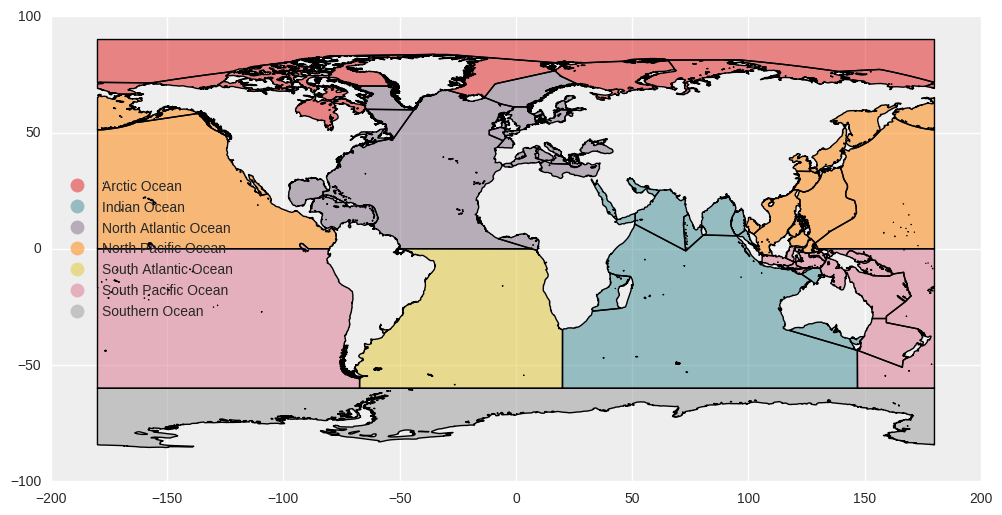

In [30]:
seas.plot(column='oceans', categorical=True, legend=True, figsize=(14,6));

**Woo-hoo, automated categorical legends!** Now I just need to figure out how to control its placement (eg, UR, LL, by x & y position, etc)   
I got this code from http://darribas.org/gds15/content/labs/lab_04.html. There are lots of other cool geopandas map plotting tips in there.

**Apply attribute and polygon area filtering before plotting.**   
Then could perform summaries/aggregations (groupby) or additional filtering on the resulting (Geo)DataFrame, and export to a table or shape file as needed.

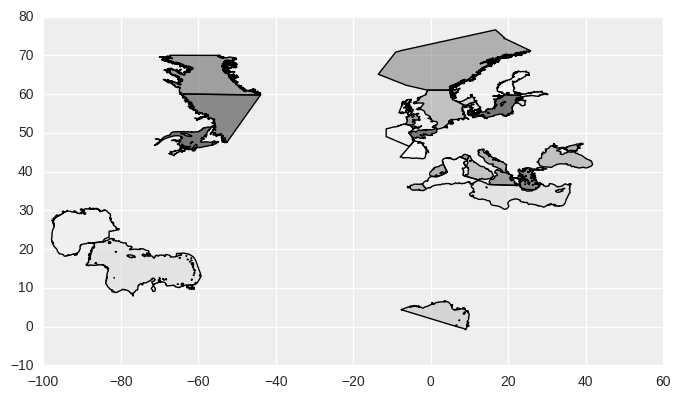

In [31]:
seas[(seas['oceans'] == 'North Atlantic Ocean') & (seas.geometry.area < 1000)].plot();

## Aside: Reading from GeoJSON WFS response into GeoDataFrame
With as few steps as possible

**HMM, can't find a simple way to read from WFS with just fiona or geopandas ...**. Look into `fiona.collection.Collection`, and notice its vsi argument; but I can't access it from gpd.read_file() or fiona.open(). http://toblerity.org/fiona/fiona.html#module-fiona.collection
- ogrinfo /vsicurl/"http://data.nanoos.org/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oa:goaoninv&outputFormat=json" -al -ro |more
- ogrinfo WFS:data.nanoos.org/geoserver/ows?service=WFS&version=1.0.0 oa:goaoninv -ro -al | more
- ogrinfo WFS:http://data.nanoos.org/geoserver/ows oa:goaoninv -ro -al | more
- http://data.nanoos.org/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oa:goaoninv&outputFormat=json
- http://data.nanoos.org/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oa:goaoninv&outputFormat=json&cql_filter=(id=27)

In [32]:
import requests
import geojson

Later, change this to pass the endpoint url and a dict of parameter:argument, instead of this long and fully composed url.

In [33]:
gswfs_url = "http://data.nanoos.org/geoserver/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=oa:goaoninv&outputFormat=json"

In [34]:
r = requests.get(gswfs_url)
gswfs_geo = geojson.loads(r.content)
type(gswfs_geo)

geojson.feature.FeatureCollection

Highlight the use of `from_features` constructor. Probably worth using it earlier on (independent of this remote-access section) on reading from `__geo_interface__`

In [35]:
# Use gswfs_geo.__geo_interface__['features']
# It might be more appropriate, guaranteed to always work (as opposed to expecting a dict)
# gswfs_gdf = GeoDataFrame.from_features(gswfs_geo['features'])
gswfs_gdf = GeoDataFrame.from_features(gswfs_geo.__geo_interface__['features'])
gswfs_gdf.head(2)

,Oceans,Source_Doc_kml,additional_organizations,agency,city,comments,comments_about_overlaps,contact_email,contact_name,country,...,platform_name_kml,platform_type,point_xy,project,sensors,source_doc,track_pt_lat,track_pt_lon,type,url
0,North Atlantic Ocean,None,,Israeli Ministry of Infrastructure,Haifa,,,jacobs1@ocean.org.il,Jacob Silverman,Israel,...,None,FOTS,None,,,FixedTimeSeries,None,None,IOLR Coastal Beach Rock Monitoring,http://www.ocean.org.il/MainPageEng.asp
1,North Pacific Ocean,None,,National Science Foundation (NSF),,"For a full listing of parameters, contact kris...",,mengeb@oregonstate.edu,Bruce Menge,US,...,None,FOTS,None,Ocean Margin Ecosystem Group for Acidification...,GIFET (pH),FixedTimeSeries,None,None,Intertidal (surf-zone) station,http://omegas.science.oregonstate.edu/


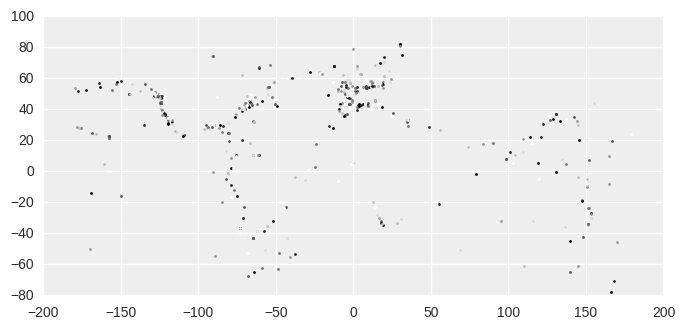

In [36]:
gswfs_gdf.plot();